### Created By :- Faldu jay
#### Email :- jay.faldu928@gmail.com


# ----------------------------------------------------------

# Exploratory Data Analysis Project

# Chicago crime detection

In this project assume that you are hired as an Analyst by Chicago Police. They have been maintaining a database of "motor vehicle theft" (sometimes referred to as grand theft auto) since last few years. This is the act of stealing, or attempting to steal, a car.

Due to increasing crimes, they want to make use of data to strategize better to maintain peace and order in their State. As a part of their Analyst team, you have been posed with some questions given below. Use your gained Data Analysis skills to answer these questions and help of the Police Department!

we are going toanssertain question in this project which give us some insite about this data.

Also by this technique we can understand and analyse dataset according to our need.

Every question is consider as goal that from data set we need that information and see the procedure to get this information. we get other similler kindof information from data set by following this steps.

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### read data from dataset

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-crime-detective/Chicago_Crime_Detective.csv


In [3]:
# change destination according to your data

df = pd.read_csv('/kaggle/input/chicago-crime-detective/Chicago_Crime_Detective.csv',parse_dates=['Date'],infer_datetime_format=True)
df.head()


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [4]:
df.Date[0]      # converted in time sucessfully

Timestamp('2012-12-31 23:15:00')

In [5]:
df.Date[0].to_pydatetime().month

12

## Data Columns details:
1. ID: a unique identifier for each observation.

2. Date: the date the crime occurred.
LocationDescription: the location where the crime occurred.

3. Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).

4. Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).

5. Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

6. District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

7. CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

8. Year: the year in which the crime occurred.
Latitude: the latitude of the location at which the crime occurred.


### adding column of month

In [6]:
df.dtypes

Unnamed: 0                      int64
ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [7]:
month=[]
for i in range(len(df.Date)):
    month.append(df.Date[i].to_pydatetime().month)

In [8]:
df.insert(10,'Month',month)

In [9]:
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12
...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,1
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1


In [10]:
df.describe(include=['object'])

,LocationDescription,District,CommunityArea
count,191641,148589.0,167038
unique,78,50.0,157
top,STREET,8.0,25
freq,156564,7462.0,6832


###    



### 1.)  What is the Month and Year of the median date in our dataset? 

In [11]:
df['Unnamed: 0'].median()

95820.0

In [12]:
df[df['Unnamed: 0'] == df['Unnamed: 0'].median()]

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
95820,95820,4752501,2006-05-21 12:30:00,STREET,False,False,725,7,67,2006,5


In [13]:
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12
...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,1
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1


###     





### 2.)  In which month did the lowest motor vehicle thefts occur?

In [14]:
df_month=df.groupby(['Month'])

In [15]:
df_month.count().ID

Month
1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
Name: ID, dtype: int64

Text(0, 0.5, 'number of crime made')

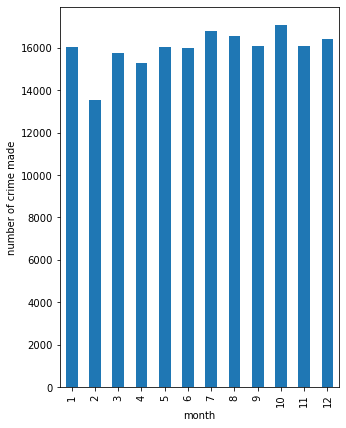

In [16]:
df_month.ID.count().plot(kind='bar',figsize=(5,7))
plt.xlabel('month')
plt.ylabel('number of crime made')

#### Minimum crime in month :- February - 13511

In [17]:
df_month_as_index =df.set_index(['Month'])  

# set month as index (its done for count frequancy of month) it's 2nd method to give ansof the above question

In [18]:
df_month_as_index.index.value_counts()  

# show frequancy of month, we can see less frequent month as february

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

Text(0, 0.5, 'number of crime made')

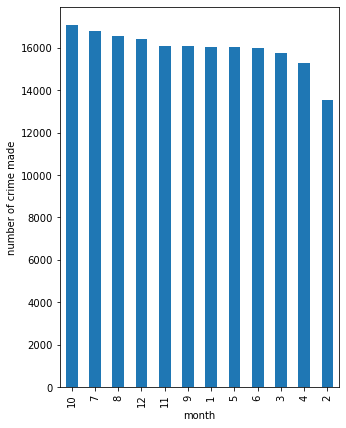

In [19]:
df_month_as_index.index.value_counts().plot(kind='bar',figsize=(5,7))
plt.xlabel('month')
plt.ylabel('number of crime made')

###       






### 3.)  On which weekday did most motor vehicle thefts occur? 

In [20]:
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12
...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,1
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1


In [21]:
df.Date[0].to_pydatetime().weekday()  # return weekday in timestamp

0

In [22]:
# make a list of weekday of all entry in df and add as column in data frame

weekday = []
for i in range(len(df.Date)):
    weekday.append(df.Date[i].to_pydatetime().weekday())

df.insert(11,'weekday',weekday)

df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [23]:
weekday_as_index = df.set_index(['weekday'])
weekday_as_index.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
weekday,,,,,,,,,,,
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
0,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
0,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
0,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
0,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12


In [24]:
weekday_as_index.index.value_counts()

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: weekday, dtype: int64

#### Ans :- hear we can see that weekday 4 means 'friday' ouucred at most frequency

Text(0, 0.5, 'number of crime made')

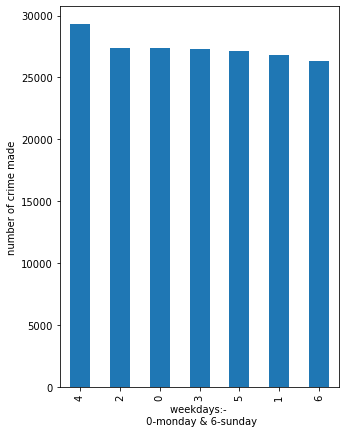

In [25]:
weekday_as_index.index.value_counts().plot(kind='bar',figsize=(5,7))
plt.xlabel('weekdays:- \n 0-monday & 6-sunday')
plt.ylabel('number of crime made')

###                                                   

### 4.)   Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? 

In [26]:
df_arrestmade = df_month_as_index[df_month_as_index.Arrest==True]
df_arrestmade.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
Month,,,,,,,,,,
12,5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012
12,8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012
12,13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012
12,47,8949895,2012-12-30 19:46:00,ALLEY,True,False,2512,25,18,2012
12,59,8949557,2012-12-30 15:00:00,STREET,True,False,2535,25,23,2012


In [27]:
df_arrestmade.index.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

#### Ans :- fromabove resulte we can say that in 'JANUARY' month most arrest was made

###                           




### 5.)   show the crime data according to Year

In [28]:
year_as_index = df.set_index('Year')
year_as_index.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Month,weekday
Year,,,,,,,,,,,
2012,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,12,0
2012,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,12,0
2012,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,12,0
2012,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,12,0
2012,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,12,0


In [29]:
year_count=year_as_index.groupby('Year').count()
year_count

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Month,weekday
Year,,,,,,,,,,,
2001,20669,20669,20669,20669,20669,20669,20669,122,586,20669,20669
2002,18753,18753,18753,18753,18753,18753,18753,494,14236,18753,18753
2003,16657,16657,16657,16657,16657,16657,16657,12977,16657,16657,16657
2004,16862,16862,16862,16862,16862,16862,16862,16824,16861,16862,16862
2005,16484,16484,16484,16484,16484,16484,16484,16403,16484,16484,16484
2006,16098,16098,16098,16098,16098,16098,16098,16069,16097,16098,16098
2007,14280,14280,14280,14280,14280,14280,14280,14271,14280,14280,14280
2008,14445,14445,14445,14445,14445,14445,14445,14280,14445,14445,14445
2009,12167,12167,12167,12167,12167,12167,12167,12040,12166,12167,12167


Text(0, 0.5, 'number of crime made')

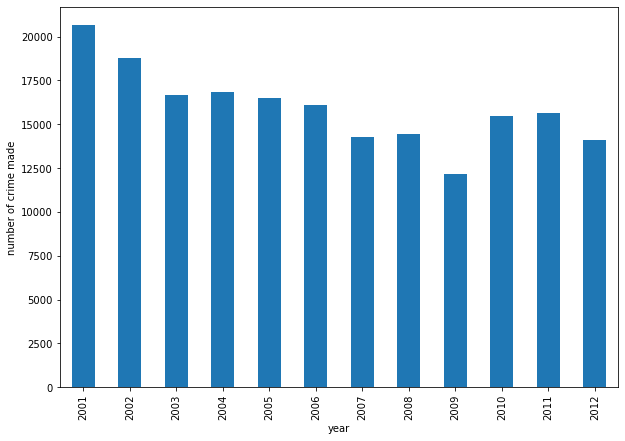

In [30]:
year_count.ID.plot(kind='bar',figsize=(10,7))
plt.xlabel('year')
plt.ylabel('number of crime made')

###                           




### 6.)   Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? 
(Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)

In [31]:
year_wise_arrestmade = year_as_index[year_as_index.Arrest==True]

In [32]:
year_wise_arrestmade[year_wise_arrestmade.index<2007].ID.count()  ## 2001 to 2006

10588

In [33]:
year_wise_arrestmade[year_wise_arrestmade.index>2006].ID.count()  ## 2007 to 2012

4948

###  



###  7.)   For what proportion of motor vehicle thefts in 2001 was an arrest made? 
Note: in this question and many others in the course, we are asking for an answer as a proportion. Therefore, your answer should take a value between 0 and 1

In [34]:
year_as_index.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Month,weekday
Year,,,,,,,,,,,
2012,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,12,0
2012,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,12,0
2012,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,12,0
2012,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,12,0
2012,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,12,0


In [35]:
groupby_year = year_as_index.groupby('Year')

In [36]:
groupby_year.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Month,weekday
Year,,,,,,,,,,,
2012,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,12,0
2012,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,12,0
2012,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,12,0
2012,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,12,0
2012,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,12,0
2011,14092,8423873,2011-12-31 23:00:00,STREET,False,False,1824,18,8,12,5
2011,14093,8465326,2011-12-31 23:00:00,STREET,False,False,1322,13,24,12,5
2011,14094,8422363,2011-12-31 22:30:00,STREET,False,False,911,9,63,12,5
2011,14095,8427059,2011-12-31 22:00:00,STREET,False,False,522,5,53,12,5


In [37]:
total_crime_by_year = groupby_year.count()
total_crime_by_year

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Month,weekday
Year,,,,,,,,,,,
2001,20669,20669,20669,20669,20669,20669,20669,122,586,20669,20669
2002,18753,18753,18753,18753,18753,18753,18753,494,14236,18753,18753
2003,16657,16657,16657,16657,16657,16657,16657,12977,16657,16657,16657
2004,16862,16862,16862,16862,16862,16862,16862,16824,16861,16862,16862
2005,16484,16484,16484,16484,16484,16484,16484,16403,16484,16484,16484
2006,16098,16098,16098,16098,16098,16098,16098,16069,16097,16098,16098
2007,14280,14280,14280,14280,14280,14280,14280,14271,14280,14280,14280
2008,14445,14445,14445,14445,14445,14445,14445,14280,14445,14445,14445
2009,12167,12167,12167,12167,12167,12167,12167,12040,12166,12167,12167


In [38]:
groupby_year_arrestmade = year_as_index[year_as_index.Arrest==True].groupby('Year')

In [39]:
total_arrest_by_year = groupby_year_arrestmade.count()
total_arrest_by_year

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Month,weekday
Year,,,,,,,,,,,
2001,2152,2152,2152,2152,2152,2152,2152,3,36,2152,2152
2002,2115,2115,2115,2115,2115,2115,2115,23,1506,2115,2115
2003,1798,1798,1798,1798,1798,1798,1798,1415,1798,1798,1798
2004,1693,1693,1693,1693,1693,1693,1693,1691,1693,1693,1693
2005,1528,1528,1528,1528,1528,1528,1528,1523,1528,1528,1528
2006,1302,1302,1302,1302,1302,1302,1302,1301,1302,1302,1302
2007,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
2008,1020,1020,1020,1020,1020,1020,1020,1013,1020,1020,1020
2009,840,840,840,840,840,840,840,833,839,840,840


Text(0, 0.5, 'number of arrest made')

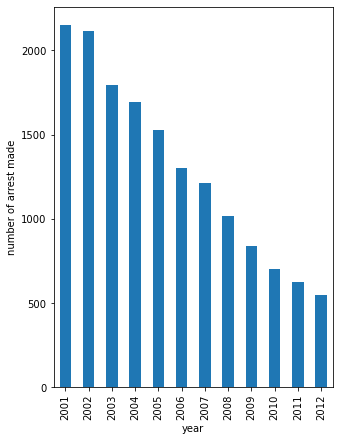

In [40]:
total_arrest_by_year.ID.plot(kind='bar',figsize=(5,7))
plt.xlabel('year')
plt.ylabel('number of arrest made')

In [41]:
arrest_proportion = total_arrest_by_year.ID/total_crime_by_year.ID
arrest_proportion

Year
2001    0.104117
2002    0.112782
2003    0.107943
2004    0.100403
2005    0.092696
2006    0.080880
2007    0.084874
2008    0.070613
2009    0.069039
2010    0.045235
2011    0.039969
2012    0.039029
Name: ID, dtype: float64

Text(0, 0.5, 'proportion of arrest made against crime happned')

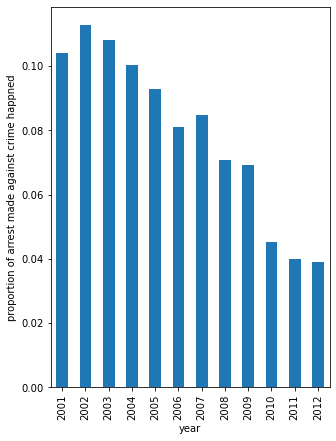

In [42]:
arrest_proportion.plot(kind='bar',figsize=(5,7))
plt.xlabel('year')
plt.ylabel('proportion of arrest made against crime happned')

###        




### 8.)  Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? 

In [43]:
location_as_index = df.set_index('LocationDescription')
location_as_index.head()

,Unnamed: 0,ID,Date,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,weekday
LocationDescription,,,,,,,,,,,
STREET,0,8951354,2012-12-31 23:15:00,False,False,623,6,69,2012,12,0
STREET,1,8951141,2012-12-31 22:00:00,False,False,1213,12,24,2012,12,0
RESIDENTIAL YARD (FRONT/BACK),2,8952745,2012-12-31 22:00:00,False,False,1622,16,11,2012,12,0
STREET,3,8952223,2012-12-31 22:00:00,False,False,724,7,67,2012,12,0
STREET,4,8951608,2012-12-31 21:30:00,False,False,211,2,35,2012,12,0


In [44]:
groupby_location = location_as_index.groupby('LocationDescription')
groupby_location.head()

,Unnamed: 0,ID,Date,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,weekday
LocationDescription,,,,,,,,,,,
STREET,0,8951354,2012-12-31 23:15:00,False,False,623,6,69,2012,12,0
STREET,1,8951141,2012-12-31 22:00:00,False,False,1213,12,24,2012,12,0
RESIDENTIAL YARD (FRONT/BACK),2,8952745,2012-12-31 22:00:00,False,False,1622,16,11,2012,12,0
STREET,3,8952223,2012-12-31 22:00:00,False,False,724,7,67,2012,12,0
STREET,4,8951608,2012-12-31 21:30:00,False,False,211,2,35,2012,12,0
...,...,...,...,...,...,...,...,...,...,...,...
OTHER COMMERCIAL TRANSPORTATION,178440,1778216,2001-09-08 12:25:00,True,False,411,NaN,NaN,2001,9,5
LAKEFRONT/WATERFRONT/RIVERBANK,182983,1601131,2001-06-24 04:15:00,False,False,2333,NaN,NaN,2001,6,6
DAY CARE CENTER,188175,1426823,2001-03-15 14:45:00,False,False,833,NaN,NaN,2001,3,3


In [45]:
count_by_location = groupby_location.ID.count().sort_values(ascending=False)
count_by_location

LocationDescription
STREET                                         156564
PARKING LOT/GARAGE(NON.RESID.)                  14852
OTHER                                            4573
ALLEY                                            2308
GAS STATION                                      2111
                                                ...  
NEWSSTAND                                           1
AIRPORT EXTERIOR - SECURE AREA                      1
AIRPORT BUILDING NON-TERMINAL - SECURE AREA         1
CTA TRAIN                                           1
JAIL / LOCK-UP FACILITY                             1
Name: ID, Length: 78, dtype: int64

#####  Top 25 location where most frequently crime are made

In [46]:
count_by_location.head(25)

LocationDescription
STREET                             156564
PARKING LOT/GARAGE(NON.RESID.)      14852
OTHER                                4573
ALLEY                                2308
GAS STATION                          2111
DRIVEWAY - RESIDENTIAL               1675
RESIDENTIAL YARD (FRONT/BACK)        1536
RESIDENCE                            1302
RESIDENCE-GARAGE                     1176
VACANT LOT/LAND                       985
VEHICLE NON-COMMERCIAL                817
SIDEWALK                              462
CHA PARKING LOT/GROUNDS               405
AIRPORT/AIRCRAFT                      363
POLICE FACILITY/VEH PARKING LOT       266
PARK PROPERTY                         255
SCHOOL, PUBLIC, GROUNDS               206
APARTMENT                             184
SPORTS ARENA/STADIUM                  166
CTA GARAGE / OTHER PROPERTY           148
COMMERCIAL / BUSINESS OFFICE          126
HOTEL/MOTEL                           124
SCHOOL, PUBLIC, BUILDING              114
HOSPITAL BUILD

###   





### 9.)  Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?

In [47]:
top5_location = ['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL']

Top5 = df[df.LocationDescription.isin(top5_location)]

In [48]:
Top5

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0
5,5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,1,0
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1,0
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1,0
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1,0


###### Top5 give total 177510 observation

###        




### 10.)   On which day of the week do the most motor vehicle thefts at gas stations happen?

In [49]:
weekday_as_index.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
weekday,,,,,,,,,,,
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
0,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
0,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
0,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
0,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12


In [50]:
weekday_as_index[weekday_as_index.LocationDescription=='GAS STATION'].index.value_counts()

5    338
6    336
4    332
3    282
0    280
2    273
1    270
Name: weekday, dtype: int64

##### Ans :- saturday

#####  By this method we can find information about any location at perticuler day

#                        THANK YOU